<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/Image_Proprocessing_for_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [3]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [5]:
import os
from PIL import Image
import numpy as np

In [6]:
def load_images_from_folder(folder, img_size=(48, 48)):
    images = []
    labels = []
    class_names = os.listdir(folder)
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Load and preprocess the image
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize(img_size)  # Resize to 48x48 pixels
            image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [16]:
class_names

['happy', 'sad', 'angry', 'surprised', 'neutral', 'disgust', 'fear']

In [7]:
# Define paths
train_dir = '/content/dataset/images/train'  # Path to training data
validation_dir = '/content/dataset/images/validation'  # Path to validation data

# Load training data
X_train, y_train = load_images_from_folder(train_dir)

# Load validation data
X_val, y_val = load_images_from_folder(validation_dir)

# Print shapes
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")

Training data: (28821, 48, 48), (28821,)
Validation data: (7066, 48, 48), (7066,)


NameError: name 'foler' is not defined

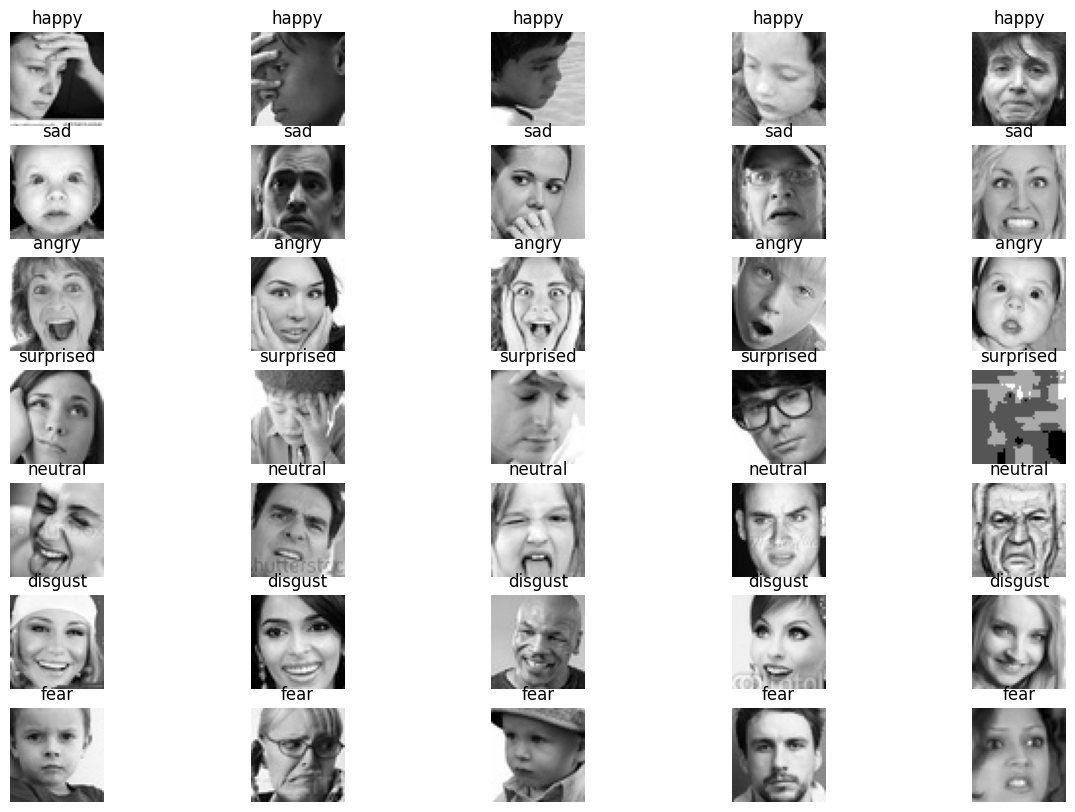

In [8]:
import matplotlib.pyplot as plt
import random

# Function to display random images from the dataset
def display_random_images(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for class_idx, class_name in enumerate(class_names):
        # Get indices of images belonging to the current class
        class_indices = [i for i, label in enumerate(labels) if label == class_idx]

        # Randomly sample images from the current class
        sample_indices = random.sample(class_indices, min(num_samples, len(class_indices)))

        # Display the sampled images
        for i, idx in enumerate(sample_indices):
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(images[idx], cmap='gray')
            plt.title(f"{class_name}")
            plt.axis('off')
    plt.show()

# Define class names (replace with your actual class names)
class_names = ["happy", "sad", "angry", "surprised", "neutral", "disgust", "fear"]

# Display random images from the training set
display_random_images(X_train, y_train, class_names)

In [9]:
# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (num_samples, 48*48)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)  # (num_samples, 48*48)

# Print shapes
print(f"Flattened training data: {X_train_flattened.shape}")
print(f"Flattened validation data: {X_val_flattened.shape}")

Flattened training data: (28821, 2304)
Flattened validation data: (7066, 2304)


In [10]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
num_classes = 7  # Number of expression classes
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

# Print shapes
print(f"One-hot encoded training labels: {y_train_one_hot.shape}")
print(f"One-hot encoded validation labels: {y_val_one_hot.shape}")

One-hot encoded training labels: (28821, 7)
One-hot encoded validation labels: (7066, 7)


In [11]:
from tensorflow.keras import layers, models

# Define the corrected ANN model
model = models.Sequential([
    layers.Input(shape=(48*48,)),  # Input layer (flattened image)
    layers.Dense(512, activation='relu'),  # Hidden layer 1
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(256, activation='relu'),  # Hidden layer 2
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),  # Hidden layer 3
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),  # Hidden layer 4
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # Output layer (7 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356,935 (5.18 MB)

 Trainable params: 1,355,015 (5.17 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [12]:
# Check the output shape of the model
print(model.output_shape)  # Should print (None, 7)

(None, 7)


In [13]:
# Check shapes
print(f"X_train_flattened shape: {X_train_flattened.shape}")  # Should print (num_samples, 2304)
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")      # Should print (num_samples, 7)
print(f"X_val_flattened shape: {X_val_flattened.shape}")      # Should print (num_samples, 2304)
print(f"y_val_one_hot shape: {y_val_one_hot.shape}")          # Should print (num_samples, 7)

X_train_flattened shape: (28821, 2304)
y_train_one_hot shape: (28821, 7)
X_val_flattened shape: (7066, 2304)
y_val_one_hot shape: (7066, 7)


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
)

# Train the model
history = model.fit(
    X_train_flattened, y_train_one_hot,
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(X_val_flattened, y_val_one_hot),
    callbacks=[early_stopping]  # Add early stopping
)

Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.1860 - loss: 2.3787 - val_accuracy: 0.2816 - val_loss: 1.7561
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.2590 - loss: 1.8002 - val_accuracy: 0.3215 - val_loss: 1.6999
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3059 - loss: 1.7323 - val_accuracy: 0.3360 - val_loss: 1.6807
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.3163 - loss: 1.7154 - val_accuracy: 0.2213 - val_loss: 1.7799
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3254 - loss: 1.7056 - val_accuracy: 0.3562 - val_loss: 1.6744
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.3314 - loss: 1.6870 - val_accuracy: 0.3433 - val_loss: 1.7051
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.3232 - loss: 1.6969 - val_accuracy: 0.2668 - val_loss: 1.9496
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.3205 - loss: 1.7141 - 

In [17]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_flattened, y_val_one_hot)
print(f"Validation Accuracy: {val_accuracy:.4f}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3685 - loss: 1.6521
Validation Accuracy: 0.3541


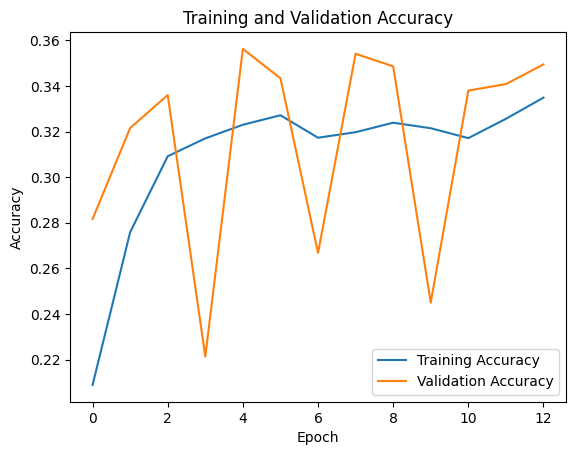

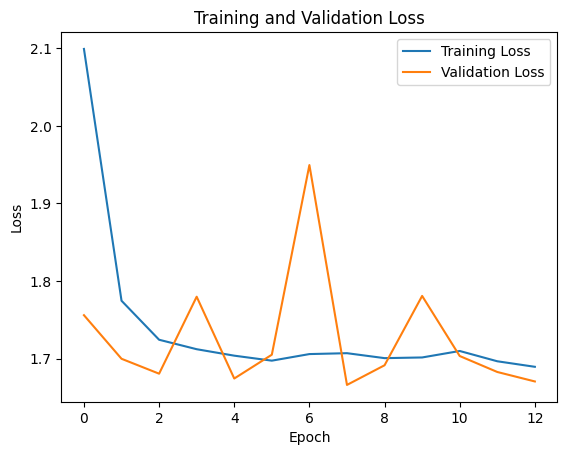

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()